In [66]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import pandas as pd
import yfinance as yfin
import numpy as np
import matplotlib.pyplot as plt

#libreria de analisis tecnico
import ta

In [ ]:
df = yfin.download("BTC-USD", start="2020-07-01", end="2021-07-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752


In [68]:
#Calculamos las MA simple
#SMA 5 dias (corta)
df["SMA_short"] = df["Adj Close"].rolling(window=5).mean()
#SMA 20 dias (larga)
df["SMA_long"] = df["Adj Close"].rolling(window=20).mean()

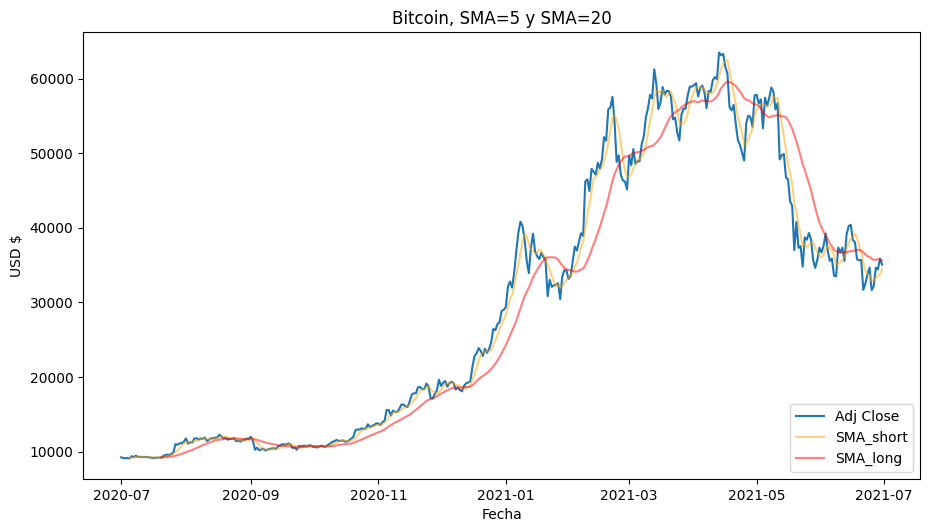

In [69]:
#Grafica de SMA
plt.figure(figsize=(10.8, 5.8))
plt.title("Bitcoin, SMA=5 y SMA=20")
plt.plot(df["Adj Close"])
plt.plot(df["SMA_short"], color="orange", alpha=0.5)
plt.plot(df["SMA_long"], color="red", alpha=0.5)
plt.xlabel("Fecha")
plt.ylabel("USD $")
plt.legend(["Adj Close", "SMA_short", "SMA_long"], loc ="lower right")
plt.show()

In [70]:
#Calculamos las MA exponensial
#EMA 5 dias (corta)
df["EMA_short"] = df["Adj Close"].ewm(span=5, adjust=False).mean()
#EMA 20 dias (larga)
df["EMA_long"] = df["Adj Close"].ewm(span=20, adjust=False).mean()

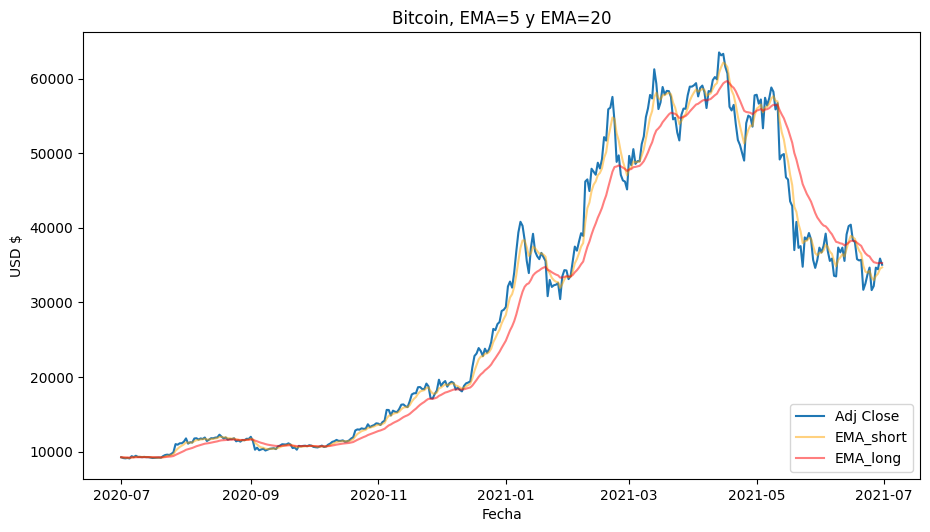

In [71]:
#Grafica de EMA
plt.figure(figsize=(10.8, 5.8))
plt.title("Bitcoin, EMA=5 y EMA=20")
plt.plot(df["Adj Close"])
plt.plot(df["EMA_short"], color="orange", alpha=0.5)
plt.plot(df["EMA_long"], color="red", alpha=0.5)
plt.xlabel("Fecha")
plt.ylabel("USD $")
plt.legend(["Adj Close", "EMA_short", "EMA_long"], loc ="lower right")
plt.show()

In [72]:
#BANDAS DE BOLLINGER, usamos libreria "ta" para hacer analisis tecnico
bb = ta.volatility.BollingerBands(close=df["Adj Close"], window=20, window_dev=2)

df["BOL_M"] = bb.bollinger_mavg()
df["BOL_S"] = bb.bollinger_hband()
df["BOL_I"] = bb.bollinger_lband()

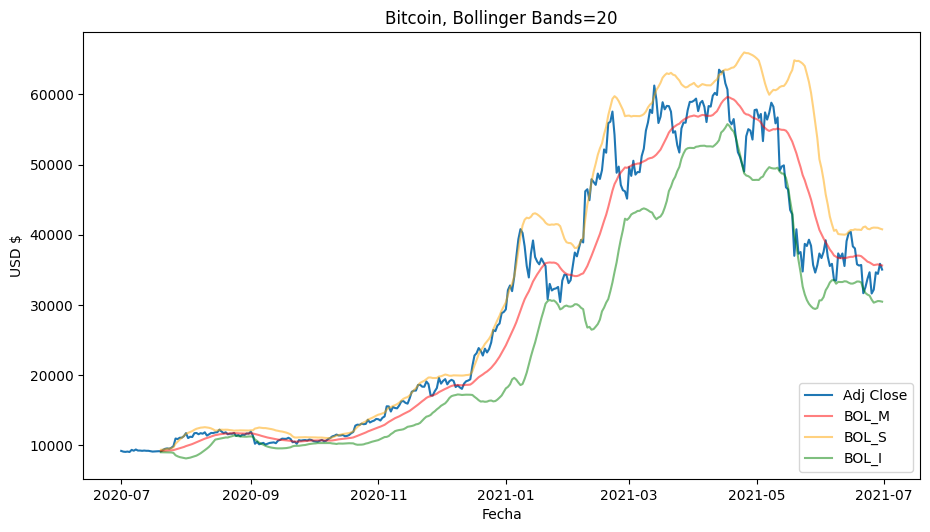

In [73]:
#Grafico de las bandas de bollinger
plt.figure(figsize=(10.8, 5.8))
plt.title("Bitcoin, Bollinger Bands=20")
plt.plot(df["Adj Close"])
plt.plot(df["BOL_M"], color="red", alpha=0.5)
plt.plot(df["BOL_S"], color="orange", alpha=0.5)
plt.plot(df["BOL_I"], color="green", alpha=0.5)
plt.xlabel("Fecha")
plt.ylabel("USD $")
plt.legend(["Adj Close", "BOL_M", "BOL_S", "BOL_I"], loc ="lower right")
plt.show()

In [74]:
#Osciladores MA de convergencia/divergencia (MACD)
df["MACD"] = ta.trend.MACD(close=df["Close"], window_fast=12, window_slow=26).macd()

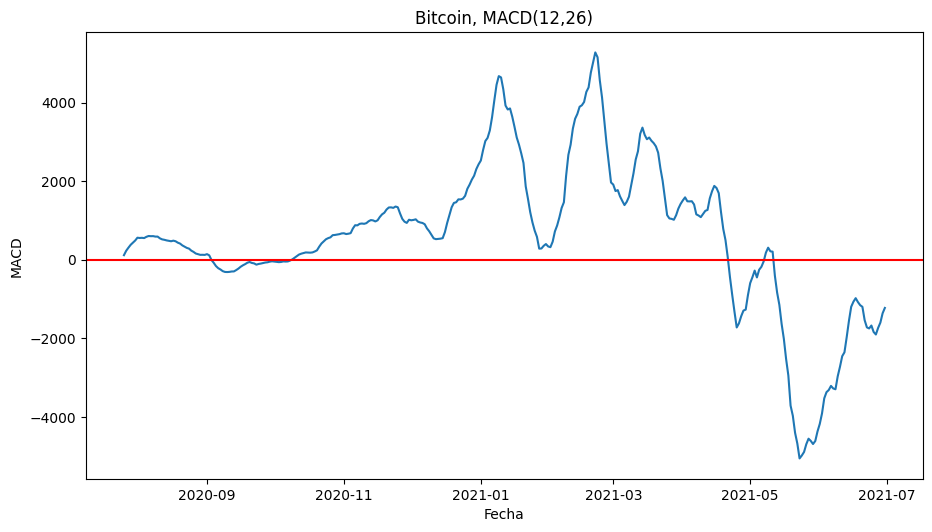

In [75]:
#Grafico de las bandas de los osciladores
plt.figure(figsize=(10.8, 5.8))
plt.title("Bitcoin, MACD(12,26)")
plt.plot(df["MACD"])
plt.xlabel("Fecha")
plt.ylabel("MACD")
plt.axhline(y=0, color="red")
plt.show()

In [76]:
#Retrocesos de Fibonacci
max_p = df["Close"].max()
min_p = df["Close"].min()

dif_p = max_p - min_p

r_fibo = np.array([0.236, 0.382, 0.5, 0.618])
levels = max_p-dif_p*r_fibo

levels

array([50658.09157422, 42711.38243555, 36288.69970703, 29866.01697852])

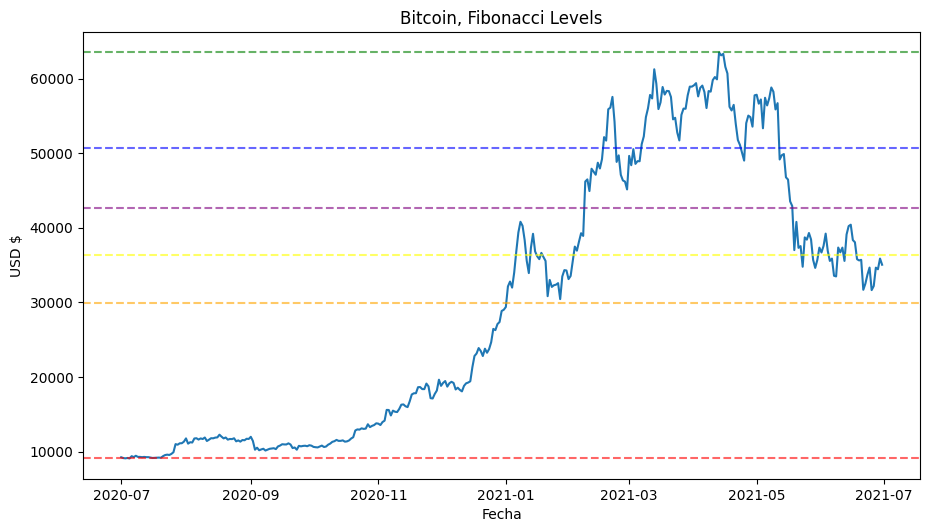

In [77]:
#Grafico de los retrosesos de Fibonacci
plt.figure(figsize=(10.8, 5.8))
plt.title("Bitcoin, Fibonacci Levels")
plt.plot(df["Close"])
plt.xlabel("Fecha")
plt.ylabel("USD $")
plt.axhline(y=max_p, color="green", linestyle="--", alpha=0.6)
plt.axhline(y=levels[0], color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=levels[1], color="purple", linestyle="--", alpha=0.6)
plt.axhline(y=levels[2], color="yellow", linestyle="--", alpha=0.6)
plt.axhline(y=levels[3], color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=min_p, color="red", linestyle="--", alpha=0.6)
plt.show()

# Examen